In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

### Now examining whole dataset in MLR (Without Scaling)

In [2]:
df2 = pd.read_csv('trainfilledMLR.csv')

In [3]:
df2.head()

population  renter_occupied_households  pct_renter_occupied   evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
0        3876                         408               24.583  397.410526       18.380   0.945945   0.010761      0.026038    0.005685   0.005635        0.0      0.005935   0.000000         4.172               0.550             0.023                 0.107                   0.062              0.310              0.166         0.100             0.083326                   0.262                    0.342                               11.022908            5.752414                            21.715153                               217      3421.828611                     2508.303867       0.471                      0.218                        0.190                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342         577
1       10224                        1166               28.346    3.000000       26.694   0.808959   0.002284      0.173426    0.001803   0.001493        0.0      0.012033   0.000000         7.714               0.545             0.040                 0.324                   0.201              0.253              0.102         0.066             0.070000                   0.200                    0.148                                9.904099            5.752414                            18.260000                               181      2009.000000                     1690.000000       0.472                      0.290                        0.077                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219         844
2       27023                        2927               21.641    9.000000       31.028   0.956621   0.005141      0.013088    0.004728   0.004708        0.0      0.014809   0.000905         9.789               0.508             0.063                 0.129                   0.032              0.296              0.215         0.087             0.070000                   0.187                    0.258                               11.011502            5.752414                            19.940000                               234      4650.000000                     1350.000000       0.496                      0.208                        0.192                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572         700
3        8735                        1039               23.110    0.000000       27.734   0.894835   0.000298      0.076576    0.000995   0.004297        0.0      0.022999   0.000000        13.735               0.545             0.038                 0.207                   0.084              0.255              0.182         0.104             0.081000                   0.169                    0.274                               12.845770            5.752414                            30.310000                               231      4420.000000                     1749.000000       0.503                      0.193      

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 40 columns):
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1562 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi                                     1562 non-null float64
pct_multiple                                  1562 non-null float64
pct_other                                     1562 non-null float64
poverty_rate 

In [5]:
df2.shape

(1562, 40)

In [6]:
df2.describe()

population  renter_occupied_households  pct_renter_occupied     evictions  rent_burden    pct_white    pct_af_am  pct_hispanic   pct_am_ind    pct_asian    pct_nh_pi  pct_multiple    pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician   pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k   gross_rent
count  1.562000e+03                1.562000e+03          1562.000000   1562.000000  1562.000000  1562.000000  1562.000000   1562.000000  1562.000000  1562.000000  1562.000000   1562.000000  1562.000000   1562.000000         1562.000000       1562.000000           1562.000000             1562.000000        1562.000000        1562.000000   1562.000000          1562.000000             1562.000000              1562.000000                             1562.000000         1562.000000                          1562.000000                       1562.000000      1562.000000                     1562.000000  1562.000000                1562.000000                  1562.000000                                 1562.000000                          1562.000000                   1562.000000                     1562.000000        1562.000000        1562.000000  1562.000000
mean   1.083407e+05                1.490462e+04            28.525570    397.410526    28.537526     0.769045     0.088593      0.092012     0.018431     0.012709     0.000711      0.017583     0.000916     12.182780            0.470535          0.062551              0.220037                0.088844           0.304546           0.211682      0.106566             0.083326                0.164818                 0.276981                               11.637336            5.752414                            21.715153                        275.482714      3421.828611                     2508.303867     0.499388                   0.228672                     0.167707                                    0.145666                             0.346271                      0.303030                        0.205033          11.621356          10.415138   701.142125
std    3.745229e+05                6.255947e+04             8.121601   1353.939638     4.670467     0.203306     0.143505      0.141599     0.074762     0.026693     0.003059      0.015836     0.001657      5.783889            0.070936          0.022615              0.067456                0.041454           0.043522           0.059405      0.022506             0.020435                0.043197                 0.053064                                1.524285            2.691047                            10.047720                         57.827540      2443.369163                     1887.374524     0.023918                   0.034710                     0.044527                                    0.067483                             0.071152                      0.052236                        0.092001           2.756009           2.772070   192.883110
min    2.690000e+02                6.400000e+01             7.279000     -1.000000     9.909000     0.009547     0.000000      0.000000     0.000000     0.000000     0.000000      0.000000     0.000000      0.000000            0.186000          0.012000              0.053000                0.018000           0.133000           0.031000      0.033000             0.030000                0.032000                 0.104000                                7.209413           -0.080000                             3.140000                         76.000

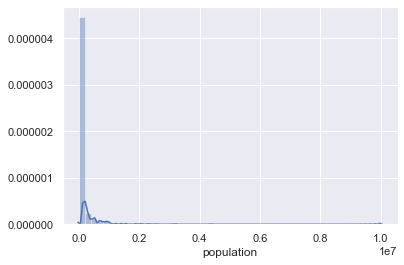

In [7]:
sns.distplot(df2.population)
plt.show()

### Using Backward Elimination method

In [8]:
df2.values

array([[3.87600000e+03, 4.08000000e+02, 2.45830000e+01, ...,
        1.00089824e+01, 9.75234185e+00, 5.77000000e+02],
       [1.02240000e+04, 1.16600000e+03, 2.83460000e+01, ...,
        1.44828927e+01, 3.01321928e+00, 8.44000000e+02],
       [2.70230000e+04, 2.92700000e+03, 2.16410000e+01, ...,
        9.62034648e+00, 1.08735717e+01, 7.00000000e+02],
       ...,
       [7.72240000e+04, 4.67700000e+03, 1.89280000e+01, ...,
        9.02928647e+00, 8.84661304e+00, 7.54000000e+02],
       [4.69800000e+03, 4.02000000e+02, 2.01070000e+01, ...,
        8.44521438e+00, 9.74447813e+00, 6.40000000e+02],
       [6.50813000e+05, 9.26800000e+04, 3.77890000e+01, ...,
        1.39446283e+01, 6.17315807e+00, 9.76000000e+02]])

In [9]:
#All features
X = df2[['population','renter_occupied_households','pct_renter_occupied','evictions','rent_burden',
        'pct_white','pct_af_am','pct_hispanic','pct_am_ind','pct_asian','pct_nh_pi','pct_multiple',
        'pct_other','poverty_rate','pct_civilian_labor','pct_unemployment','pct_uninsured_adults',
        'pct_uninsured_children','pct_adult_obesity','pct_adult_smoking','pct_diabetes','pct_low_birthweight',
        'pct_excessive_drinking','pct_physical_inactivity','air_pollution_particulate_matter_value',
        'homicides_per_100k','motor_vehicle_crash_deaths_per_100k','heart_disease_mortality_per_100k',
        'pop_per_dentist','pop_per_primary_care_physician','pct_female','pct_below_18_years_of_age',
        'pct_aged_65_years_and_older','pct_adults_less_than_a_high_school_diploma',
        'pct_adults_with_high_school_diploma','pct_adults_with_some_college','pct_adults_bachelors_or_higher',
        'birth_rate_per_1k','death_rate_per_1k']]      
y = df2['gross_rent']

In [10]:
X.head()

population  renter_occupied_households  pct_renter_occupied   evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
0        3876                         408               24.583  397.410526       18.380   0.945945   0.010761      0.026038    0.005685   0.005635        0.0      0.005935   0.000000         4.172               0.550             0.023                 0.107                   0.062              0.310              0.166         0.100             0.083326                   0.262                    0.342                               11.022908            5.752414                            21.715153                               217      3421.828611                     2508.303867       0.471                      0.218                        0.190                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342
1       10224                        1166               28.346    3.000000       26.694   0.808959   0.002284      0.173426    0.001803   0.001493        0.0      0.012033   0.000000         7.714               0.545             0.040                 0.324                   0.201              0.253              0.102         0.066             0.070000                   0.200                    0.148                                9.904099            5.752414                            18.260000                               181      2009.000000                     1690.000000       0.472                      0.290                        0.077                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219
2       27023                        2927               21.641    9.000000       31.028   0.956621   0.005141      0.013088    0.004728   0.004708        0.0      0.014809   0.000905         9.789               0.508             0.063                 0.129                   0.032              0.296              0.215         0.087             0.070000                   0.187                    0.258                               11.011502            5.752414                            19.940000                               234      4650.000000                     1350.000000       0.496                      0.208                        0.192                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572
3        8735                        1039               23.110    0.000000       27.734   0.894835   0.000298      0.076576    0.000995   0.004297        0.0      0.022999   0.000000        13.735               0.545             0.038                 0.207                   0.084              0.255              0.182         0.104             0.081000                   0.169                    0.274                               12.845770            5.752414                            30.310000                               231      4420.000000                     1749.000000       0.503                      0.193                        0.215                         

In [11]:
y.head()

0    577
1    844
2    700
3    592
4    444
Name: gross_rent, dtype: int64

In [12]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9360.6
No. Observations:                1562   AIC:                         1.880e+04
Df Residuals:                    1524   BIC:                         1.900e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -3.198e+06   2.93e+08     -0.011      0.991   -5.77e+08    5.71e+08
population                                     0.0002   3.75e-05      6.008      0.000       0.000       0.000
renter_occupied_households                    -0.0010      0.000     -4.598      0.000      -0.001      -0.001
pct_renter_occupied                            0.0371      0.495      0.075      0.940      -0.933       1.007
evictions                                     -0.0111      0.003     -3.638      0.000      -0.017      -0.005
rent_burden                                    8.0664      0.788     10.237      0.000       6.521       9.612
pct_white                                   4.016e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_af_am                                   4.016e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_hispanic                                4.016e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_am_ind                                  4.016e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_asian                                   4.017e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_nh_pi                                   4.016e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_multiple                                4.017e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
pct_other                                   4.023e+06   3.67e+08      0.011      0.991   -7.17e+08    7.25e+08
poverty_rate                                 -14.1472      0.933    -15.169      0.000     -15.977     -12.318
pct_civilian_labor                           -15.9868     61.222     -0.261      0.794    -136.076     104.102
pct_unemployment                             682.0000    179.675      3.796      0.000     329.564    1034.436
pct_uninsured_adults                         -69.7469     94.283     -0.740      0.460    -254.686     115.192
pct_uninsured_children                       114.5388    130.276      0.879      0.379    -141.000     370.078
pct_adult_obesity                           -662.6995    111.660     -5.935      0.000    -881.723    -443.676
pct_adult_smoking                            358.6520     57.389      6.250      0.000     246.083     471.221
pct_diabetes                                 760.8254    248.981      3.056      0.002     272.445    1249.206
pct_low_birthweight                         -550.7255    202.495     -2.720      0.007    -947.923    -153.528
pct_excessive_drinking                       -80.3254     68.038     -1.181      0.238    -213.783      53.132
pct_physical_inactivity                     -206.4324     93.350     -2.211      0.027

In [13]:
#Remove death_rate_per_1k
X = df2.iloc[:,0:38]
y = df2.iloc[:,39]

In [14]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9371.6
No. Observations:                1562   AIC:                         1.882e+04
Df Residuals:                    1525   BIC:                         1.902e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1.685e+07   2.95e+08     -0.057      0.954   -5.95e+08    5.61e+08
population                                     0.0002   3.78e-05      6.045      0.000       0.000       0.000
renter_occupied_households                    -0.0010      0.000     -4.586      0.000      -0.001      -0.001
pct_renter_occupied                            0.0450      0.498      0.090      0.928      -0.932       1.022
evictions                                     -0.0115      0.003     -3.726      0.000      -0.018      -0.005
rent_burden                                    8.2028      0.793     10.347      0.000       6.648       9.758
pct_white                                   2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_af_am                                   2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_hispanic                                2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_am_ind                                  2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_asian                                   2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_nh_pi                                   2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_multiple                                2.115e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
pct_other                                   2.116e+07    3.7e+08      0.057      0.954   -7.04e+08    7.47e+08
poverty_rate                                 -14.6488      0.933    -15.708      0.000     -16.478     -12.819
pct_civilian_labor                           -17.8375     61.632     -0.289      0.772    -138.731     103.056
pct_unemployment                             730.9160    180.570      4.048      0.000     376.724    1085.109
pct_uninsured_adults                         -49.1448     94.811     -0.518      0.604    -235.119     136.830
pct_uninsured_children                       146.2506    130.970      1.117      0.264    -110.650     403.151
pct_adult_obesity                           -661.2922    112.409     -5.883      0.000    -881.786    -440.799
pct_adult_smoking                            348.7669     57.734      6.041      0.000     235.520     462.014
pct_diabetes                                 767.1495    250.649      3.061      0.002     275.497    1258.802
pct_low_birthweight                         -583.3494    203.732     -2.863      0.004    -982.973    -183.725
pct_excessive_drinking                       -86.2032     68.483     -1.259      0.208    -220.533      48.127
pct_physical_inactivity                     -225.2474     93.888     -2.399      0.017

In [15]:
#Remove birth_rate_per_1k
X = df2.iloc[:,0:37]
y = df2.iloc[:,39]

In [16]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9371.7
No. Observations:                1562   AIC:                         1.882e+04
Df Residuals:                    1526   BIC:                         1.901e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1.839e+07   2.95e+08     -0.062      0.950   -5.96e+08    5.59e+08
population                                     0.0002   3.76e-05      6.031      0.000       0.000       0.000
renter_occupied_households                    -0.0010      0.000     -4.568      0.000      -0.001      -0.001
pct_renter_occupied                            0.0793      0.492      0.161      0.872      -0.885       1.044
evictions                                     -0.0114      0.003     -3.711      0.000      -0.017      -0.005
rent_burden                                    8.1925      0.792     10.342      0.000       6.639       9.746
pct_white                                   2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_af_am                                   2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_hispanic                                2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_am_ind                                  2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_asian                                   2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_nh_pi                                   2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_multiple                                2.308e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
pct_other                                   2.309e+07    3.7e+08      0.062      0.950   -7.02e+08    7.48e+08
poverty_rate                                 -14.6269      0.931    -15.710      0.000     -16.453     -12.801
pct_civilian_labor                           -18.5616     61.594     -0.301      0.763    -139.380     102.257
pct_unemployment                             719.7754    178.759      4.027      0.000     369.136    1070.415
pct_uninsured_adults                         -47.3557     94.700     -0.500      0.617    -233.112     138.400
pct_uninsured_children                       141.1587    130.429      1.082      0.279    -114.681     396.998
pct_adult_obesity                           -657.8760    112.114     -5.868      0.000    -877.790    -437.962
pct_adult_smoking                            348.5118     57.716      6.038      0.000     235.301     461.723
pct_diabetes                                 758.1805    249.762      3.036      0.002     268.267    1248.094
pct_low_birthweight                         -590.0884    203.108     -2.905      0.004    -988.489    -191.688
pct_excessive_drinking                       -87.6703     68.384     -1.282      0.200    -221.808      46.467
pct_physical_inactivity                     -222.5719     93.669     -2.376      0.018

In [17]:
#Remove pct_adults_bachelors_or_higher
X = df2.iloc[:,0:36]
y = df2.iloc[:,39]

In [18]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9371.7
No. Observations:                1562   AIC:                         1.882e+04
Df Residuals:                    1526   BIC:                         1.901e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -2.903e+07    3.7e+08     -0.078      0.937   -7.55e+08    6.97e+08
population                                     0.0002   3.76e-05      6.031      0.000       0.000       0.000
renter_occupied_households                    -0.0010      0.000     -4.568      0.000      -0.001      -0.001
pct_renter_occupied                            0.0796      0.492      0.162      0.871      -0.885       1.044
evictions                                     -0.0114      0.003     -3.711      0.000      -0.017      -0.005
rent_burden                                    8.1923      0.792     10.341      0.000       6.638       9.746
pct_white                                   2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_af_am                                   2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_hispanic                                2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_am_ind                                  2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_asian                                   2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_nh_pi                                   2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_multiple                                2.903e+07    3.7e+08      0.078      0.937   -6.97e+08    7.55e+08
pct_other                                   2.904e+07    3.7e+08      0.079      0.937   -6.97e+08    7.55e+08
poverty_rate                                 -14.6266      0.931    -15.710      0.000     -16.453     -12.800
pct_civilian_labor                           -18.5578     61.594     -0.301      0.763    -139.376     102.260
pct_unemployment                             719.8154    178.758      4.027      0.000     369.178    1070.453
pct_uninsured_adults                         -47.4005     94.699     -0.501      0.617    -233.154     138.353
pct_uninsured_children                       141.2459    130.425      1.083      0.279    -114.586     397.078
pct_adult_obesity                           -657.9186    112.116     -5.868      0.000    -877.837    -438.001
pct_adult_smoking                            348.5264     57.716      6.039      0.000     235.316     461.736
pct_diabetes                                 758.2182    249.763      3.036      0.002     268.303    1248.133
pct_low_birthweight                         -590.0691    203.105     -2.905      0.004    -988.465    -191.674
pct_excessive_drinking                       -87.6936     68.384     -1.282      0.200    -221.830      46.442
pct_physical_inactivity                     -222.5747     93.669     -2.376      0.018

In [19]:
#Remove pct_adults_with_some_college
X = df2.iloc[:,0:35]
y = df2.iloc[:,39]

In [20]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9410.6
No. Observations:                1562   AIC:                         1.889e+04
Df Residuals:                    1527   BIC:                         1.908e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1.133e+08   3.79e+08     -0.299      0.765   -8.57e+08     6.3e+08
population                                     0.0002   3.85e-05      6.361      0.000       0.000       0.000
renter_occupied_households                    -0.0011      0.000     -4.976      0.000      -0.002      -0.001
pct_renter_occupied                            0.0463      0.504      0.092      0.927      -0.942       1.035
evictions                                     -0.0108      0.003     -3.434      0.001      -0.017      -0.005
rent_burden                                    8.4314      0.811     10.391      0.000       6.840      10.023
pct_white                                   1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_af_am                                   1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_hispanic                                1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_am_ind                                  1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_asian                                   1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_nh_pi                                   1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_multiple                                1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
pct_other                                   1.133e+08   3.79e+08      0.299      0.765    -6.3e+08    8.57e+08
poverty_rate                                 -15.1985      0.952    -15.966      0.000     -17.066     -13.331
pct_civilian_labor                           -15.0001     63.127     -0.238      0.812    -138.825     108.825
pct_unemployment                             535.6557    181.961      2.944      0.003     178.736     892.576
pct_uninsured_adults                         -56.0344     97.052     -0.577      0.564    -246.405     134.336
pct_uninsured_children                       121.8050    133.655      0.911      0.362    -140.362     383.972
pct_adult_obesity                           -898.6271    111.463     -8.062      0.000   -1117.265    -679.989
pct_adult_smoking                            300.0055     58.885      5.095      0.000     184.502     415.509
pct_diabetes                                 912.8549    255.355      3.575      0.000     411.970    1413.739
pct_low_birthweight                         -445.8630    207.492     -2.149      0.032    -852.862     -38.864
pct_excessive_drinking                      -102.2885     70.067     -1.460      0.145    -239.726      35.149
pct_physical_inactivity                     -216.0713     95.999     -2.251      0.025

In [21]:
#Remove pct_adults_with_high_school_diploma
X = df2.iloc[:,0:34]
y = df2.iloc[:,39]

In [22]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     121.7
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9428.5
No. Observations:                1562   AIC:                         1.893e+04
Df Residuals:                    1528   BIC:                         1.911e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1.576e+08   3.83e+08     -0.411      0.681   -9.09e+08    5.94e+08
population                                     0.0003   3.89e-05      6.728      0.000       0.000       0.000
renter_occupied_households                    -0.0012      0.000     -5.446      0.000      -0.002      -0.001
pct_renter_occupied                            0.4565      0.505      0.904      0.366      -0.534       1.447
evictions                                     -0.0101      0.003     -3.165      0.002      -0.016      -0.004
rent_burden                                    8.8022      0.818     10.759      0.000       7.197      10.407
pct_white                                   1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_af_am                                   1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_hispanic                                1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_am_ind                                  1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_asian                                   1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_nh_pi                                   1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_multiple                                1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_other                                   1.576e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
poverty_rate                                 -15.7110      0.959    -16.389      0.000     -17.591     -13.831
pct_civilian_labor                           -53.9750     63.491     -0.850      0.395    -178.514      70.564
pct_unemployment                             374.3994    181.953      2.058      0.040      17.495     731.304
pct_uninsured_adults                         -98.8168     97.872     -1.010      0.313    -290.794      93.161
pct_uninsured_children                       174.4009    134.859      1.293      0.196     -90.127     438.929
pct_adult_obesity                           -979.2963    111.878     -8.753      0.000   -1198.748    -759.845
pct_adult_smoking                            262.2850     59.200      4.431      0.000     146.163     378.407
pct_diabetes                                 884.3455    258.174      3.425      0.001     377.933    1390.758
pct_low_birthweight                         -365.0585    209.370     -1.744      0.081    -775.741      45.624
pct_excessive_drinking                      -138.9133     70.579     -1.968      0.049    -277.356      -0.471
pct_physical_inactivity                     -318.5609     95.503     -3.336      0.001

In [23]:
#Remove pct_adults_less_than_a_high_school_diploma
X = df2.iloc[:,0:33]
y = df2.iloc[:,39]

In [24]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9428.6
No. Observations:                1562   AIC:                         1.892e+04
Df Residuals:                    1529   BIC:                         1.910e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.573e+08   3.83e+08     -0.411      0.681   -9.09e+08    5.94e+08
population                                 0.0003   3.88e-05      6.745      0.000       0.000       0.000
renter_occupied_households                -0.0012      0.000     -5.472      0.000      -0.002      -0.001
pct_renter_occupied                        0.4620      0.504      0.917      0.359      -0.526       1.450
evictions                                 -0.0100      0.003     -3.161      0.002      -0.016      -0.004
rent_burden                                8.8128      0.816     10.802      0.000       7.213      10.413
pct_white                               1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_af_am                               1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_hispanic                            1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_am_ind                              1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_asian                               1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_nh_pi                               1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_multiple                            1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
pct_other                               1.573e+08   3.83e+08      0.411      0.681   -5.94e+08    9.09e+08
poverty_rate                             -15.7646      0.914    -17.241      0.000     -17.558     -13.971
pct_civilian_labor                       -53.7465     63.459     -0.847      0.397    -178.223      70.730
pct_unemployment                         371.8696    181.390      2.050      0.041      16.069     727.670
pct_uninsured_adults                    -103.5410     94.515     -1.096      0.273    -288.933      81.851
pct_uninsured_children                   177.9735    133.453      1.334      0.183     -83.797     439.744
pct_adult_obesity                       -979.3119    111.843     -8.756      0.000   -1198.694    -759.930
pct_adult_smoking                        261.3333     58.961      4.432      0.000     145.680     376.987
pct_diabetes                             878.2834    256.043      3.430      0.001     376.050    1380.517
pct_low_birthweight                     -362.3451    208.798     -1.735      0.083    -771.907      47.217
pct_excessive_drinking                  -139.1552     70.545     -1.973      0.049    -277.530      -0.780
pct_physical_inactivity                 -320.2714     95.032     -3.370      0.001    -506.679    -133.864
air_pollution_particulate_matter_value    -8.6975      2.135     -4.074      0.000     

In [25]:
#Remove pct_aged_65_years_and_older
X = df2.iloc[:,0:32]
y = df2.iloc[:,39]

In [26]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9474.2
No. Observations:                1562   AIC:                         1.901e+04
Df Residuals:                    1530   BIC:                         1.918e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -9.005e+07   3.94e+08     -0.228      0.819   -8.63e+08    6.83e+08
population                                 0.0003   3.99e-05      6.534      0.000       0.000       0.000
renter_occupied_households                -0.0013      0.000     -5.437      0.000      -0.002      -0.001
pct_renter_occupied                        1.8657      0.496      3.760      0.000       0.892       2.839
evictions                                 -0.0084      0.003     -2.578      0.010      -0.015      -0.002
rent_burden                               10.3852      0.823     12.623      0.000       8.772      11.999
pct_white                               9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_af_am                               9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_hispanic                            9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_am_ind                              9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_asian                               9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_nh_pi                               9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_multiple                            9.005e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
pct_other                               9.006e+07   3.94e+08      0.228      0.819   -6.83e+08    8.63e+08
poverty_rate                             -16.7748      0.935    -17.942      0.000     -18.609     -14.941
pct_civilian_labor                        29.0874     64.715      0.449      0.653     -97.851     156.026
pct_unemployment                         331.9078    186.664      1.778      0.076     -34.237     698.053
pct_uninsured_adults                     -11.4621     96.786     -0.118      0.906    -201.309     178.385
pct_uninsured_children                   -69.4059    134.783     -0.515      0.607    -333.784     194.973
pct_adult_obesity                       -870.0883    114.527     -7.597      0.000   -1094.736    -645.441
pct_adult_smoking                        337.6115     60.137      5.614      0.000     219.651     455.572
pct_diabetes                             297.4163    256.089      1.161      0.246    -204.905     799.738
pct_low_birthweight                     -224.3203    214.415     -1.046      0.296    -644.899     196.259
pct_excessive_drinking                  -195.2516     72.366     -2.698      0.007    -337.198     -53.306
pct_physical_inactivity                 -438.8458     96.991     -4.525      0.000    -629.095    -248.596
air_pollution_particulate_matter_value    -3.4693      2.125     -1.633      0.103     

In [27]:
#Remove pct_below_18_years_of_age 	
X = df2.iloc[:,0:31]
y = df2.iloc[:,39]

In [28]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:09   Log-Likelihood:                -9506.0
No. Observations:                1562   AIC:                         1.907e+04
Df Residuals:                    1531   BIC:                         1.924e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -4.454e+07   4.02e+08     -0.111      0.912   -8.33e+08    7.44e+08
population                                 0.0003   4.03e-05      7.605      0.000       0.000       0.000
renter_occupied_households                -0.0015      0.000     -6.460      0.000      -0.002      -0.001
pct_renter_occupied                        1.5236      0.504      3.021      0.003       0.534       2.513
evictions                                 -0.0083      0.003     -2.498      0.013      -0.015      -0.002
rent_burden                                8.8496      0.816     10.846      0.000       7.249      10.450
pct_white                               4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_af_am                               4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_hispanic                            4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_am_ind                              4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_asian                               4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_nh_pi                               4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_multiple                            4.454e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
pct_other                               4.455e+07   4.02e+08      0.111      0.912   -7.44e+08    8.33e+08
poverty_rate                             -15.7082      0.944    -16.640      0.000     -17.560     -13.857
pct_civilian_labor                        15.7515     65.999      0.239      0.811    -113.706     145.209
pct_unemployment                         112.1932    188.341      0.596      0.551    -257.241     481.627
pct_uninsured_adults                      19.6772     98.659      0.199      0.842    -173.844     213.198
pct_uninsured_children                   -87.0479    137.485     -0.633      0.527    -356.727     182.631
pct_adult_obesity                       -578.2764    110.699     -5.224      0.000    -795.414    -361.138
pct_adult_smoking                        334.6114     61.350      5.454      0.000     214.272     454.951
pct_diabetes                            -351.9390    247.664     -1.421      0.156    -837.736     133.858
pct_low_birthweight                     -523.2733    215.366     -2.430      0.015    -945.716    -100.830
pct_excessive_drinking                  -241.3838     73.589     -3.280      0.001    -385.731     -97.037
pct_physical_inactivity                 -488.8028     98.742     -4.950      0.000    -682.486    -295.119
air_pollution_particulate_matter_value    -0.8901      2.143     -0.415      0.678     

In [29]:
#Remove pct_female
X = df2.iloc[:,0:30]
y = df2.iloc[:,39]

In [30]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9509.2
No. Observations:                1562   AIC:                         1.908e+04
Df Residuals:                    1532   BIC:                         1.924e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.032e+07   4.03e+08     -0.175      0.861    -8.6e+08     7.2e+08
population                                 0.0003   4.03e-05      7.777      0.000       0.000       0.000
renter_occupied_households                -0.0016      0.000     -6.611      0.000      -0.002      -0.001
pct_renter_occupied                        1.5393      0.505      3.047      0.002       0.548       2.530
evictions                                 -0.0080      0.003     -2.410      0.016      -0.015      -0.001
rent_burden                                9.0962      0.812     11.209      0.000       7.504      10.688
pct_white                               7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_af_am                               7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_hispanic                            7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_am_ind                              7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_asian                               7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_nh_pi                               7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_multiple                            7.032e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
pct_other                               7.033e+07   4.03e+08      0.175      0.861    -7.2e+08     8.6e+08
poverty_rate                             -15.6357      0.945    -16.541      0.000     -17.490     -13.782
pct_civilian_labor                        67.1193     62.917      1.067      0.286     -56.293     190.531
pct_unemployment                         157.5387    187.820      0.839      0.402    -210.872     525.949
pct_uninsured_adults                      36.4310     98.611      0.369      0.712    -156.996     229.858
pct_uninsured_children                  -135.0655    136.412     -0.990      0.322    -402.640     132.509
pct_adult_obesity                       -623.6213    109.435     -5.699      0.000    -838.280    -408.963
pct_adult_smoking                        313.9666     60.914      5.154      0.000     194.483     433.450
pct_diabetes                            -185.5868    239.219     -0.776      0.438    -654.819     283.645
pct_low_birthweight                     -535.2107    215.694     -2.481      0.013    -958.298    -112.123
pct_excessive_drinking                  -260.4521     73.333     -3.552      0.000    -404.295    -116.609
pct_physical_inactivity                 -486.2721     98.911     -4.916      0.000    -680.288    -292.257
air_pollution_particulate_matter_value    -0.9288      2.146     -0.433      0.665     

In [31]:
#Remove pop_per_primary_care_physician
X = df2.iloc[:,0:29]
y = df2.iloc[:,39]

In [32]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9509.2
No. Observations:                1562   AIC:                         1.908e+04
Df Residuals:                    1533   BIC:                         1.923e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.021e+07   4.03e+08     -0.174      0.862    -8.6e+08    7.19e+08
population                                 0.0003   4.03e-05      7.790      0.000       0.000       0.000
renter_occupied_households                -0.0016      0.000     -6.624      0.000      -0.002      -0.001
pct_renter_occupied                        1.5416      0.500      3.082      0.002       0.560       2.523
evictions                                 -0.0080      0.003     -2.410      0.016      -0.015      -0.001
rent_burden                                9.0953      0.811     11.217      0.000       7.505      10.686
pct_white                               7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_af_am                               7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_hispanic                            7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_am_ind                              7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_asian                               7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_nh_pi                               7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_multiple                            7.021e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
pct_other                               7.022e+07   4.03e+08      0.174      0.862   -7.19e+08     8.6e+08
poverty_rate                             -15.6353      0.945    -16.548      0.000     -17.489     -13.782
pct_civilian_labor                        67.1192     62.896      1.067      0.286     -56.253     190.491
pct_unemployment                         157.2827    187.600      0.838      0.402    -210.697     525.262
pct_uninsured_adults                      36.3735     98.564      0.369      0.712    -156.960     229.707
pct_uninsured_children                  -135.1445    136.347     -0.991      0.322    -402.591     132.302
pct_adult_obesity                       -623.8390    109.203     -5.713      0.000    -838.041    -409.637
pct_adult_smoking                        313.8839     60.843      5.159      0.000     194.540     433.228
pct_diabetes                            -185.1594    238.795     -0.775      0.438    -653.558     283.239
pct_low_birthweight                     -534.4989    214.555     -2.491      0.013    -955.352    -113.646
pct_excessive_drinking                  -260.5057     73.291     -3.554      0.000    -404.267    -116.745
pct_physical_inactivity                 -486.4013     98.802     -4.923      0.000    -680.203    -292.599
air_pollution_particulate_matter_value    -0.9284      2.146     -0.433      0.665     

In [33]:
#Remove pop_per_dentist
X = df2.iloc[:,0:28]
y = df2.iloc[:,39]

In [34]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9509.7
No. Observations:                1562   AIC:                         1.908e+04
Df Residuals:                    1534   BIC:                         1.923e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -6.623e+07   4.03e+08     -0.165      0.869   -8.56e+08    7.23e+08
population                                 0.0003   4.02e-05      7.746      0.000       0.000       0.000
renter_occupied_households                -0.0015      0.000     -6.574      0.000      -0.002      -0.001
pct_renter_occupied                        1.4386      0.487      2.951      0.003       0.482       2.395
evictions                                 -0.0082      0.003     -2.456      0.014      -0.015      -0.002
rent_burden                                9.0695      0.810     11.192      0.000       7.480      10.659
pct_white                               6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_af_am                               6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_hispanic                            6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_am_ind                              6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_asian                               6.624e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_nh_pi                               6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_multiple                            6.623e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
pct_other                               6.624e+07   4.03e+08      0.165      0.869   -7.23e+08    8.56e+08
poverty_rate                             -15.5707      0.942    -16.526      0.000     -17.419     -13.723
pct_civilian_labor                        62.2366     62.668      0.993      0.321     -60.687     185.160
pct_unemployment                         152.0867    187.505      0.811      0.417    -215.706     519.880
pct_uninsured_adults                      39.8990     98.484      0.405      0.685    -153.278     233.076
pct_uninsured_children                  -131.5136    136.283     -0.965      0.335    -398.834     135.807
pct_adult_obesity                       -623.5237    109.197     -5.710      0.000    -837.714    -409.333
pct_adult_smoking                        318.1926     60.659      5.246      0.000     199.210     437.175
pct_diabetes                            -200.7293    238.180     -0.843      0.399    -667.922     266.463
pct_low_birthweight                     -535.2269    214.543     -2.495      0.013    -956.056    -114.398
pct_excessive_drinking                  -255.6820     73.099     -3.498      0.000    -399.066    -112.298
pct_physical_inactivity                 -480.0826     98.557     -4.871      0.000    -673.404    -286.761
air_pollution_particulate_matter_value    -0.7815      2.140     -0.365      0.715     

In [35]:
#Remove heart_disease_mortality_per_100k
X = df2.iloc[:,0:27]
y = df2.iloc[:,39]

In [36]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9509.8
No. Observations:                1562   AIC:                         1.907e+04
Df Residuals:                    1535   BIC:                         1.922e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -6.327e+07   4.02e+08     -0.157      0.875   -8.53e+08    7.26e+08
population                                 0.0003      4e-05      7.734      0.000       0.000       0.000
renter_occupied_households                -0.0015      0.000     -6.558      0.000      -0.002      -0.001
pct_renter_occupied                        1.4094      0.484      2.914      0.004       0.461       2.358
evictions                                 -0.0081      0.003     -2.443      0.015      -0.015      -0.002
rent_burden                                9.1017      0.807     11.272      0.000       7.518      10.685
pct_white                               6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_af_am                               6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_hispanic                            6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_am_ind                              6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_asian                               6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_nh_pi                               6.327e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_multiple                            6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
pct_other                               6.328e+07   4.02e+08      0.157      0.875   -7.26e+08    8.53e+08
poverty_rate                             -15.6440      0.930    -16.824      0.000     -17.468     -13.820
pct_civilian_labor                        64.5153     62.478      1.033      0.302     -58.035     187.066
pct_unemployment                         146.7784    187.142      0.784      0.433    -220.302     513.858
pct_uninsured_adults                      38.2781     98.403      0.389      0.697    -154.741     231.297
pct_uninsured_children                  -126.1205    135.799     -0.929      0.353    -392.491     140.250
pct_adult_obesity                       -629.9173    108.378     -5.812      0.000    -842.502    -417.333
pct_adult_smoking                        314.0135     60.034      5.231      0.000     196.256     431.771
pct_diabetes                            -209.1686    237.490     -0.881      0.379    -675.008     256.670
pct_low_birthweight                     -541.7655    214.070     -2.531      0.011    -961.665    -121.866
pct_excessive_drinking                  -254.9329     73.064     -3.489      0.000    -398.250    -111.616
pct_physical_inactivity                 -489.7161     96.529     -5.073      0.000    -679.059    -300.373
air_pollution_particulate_matter_value    -0.8004      2.139     -0.374      0.708     

In [37]:
#Remove motor_vehicle_crash_deaths_per_100k
X = df2.iloc[:,0:26]
y = df2.iloc[:,39]

In [38]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9513.7
No. Observations:                1562   AIC:                         1.908e+04
Df Residuals:                    1536   BIC:                         1.922e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.759e+07   4.03e+08     -0.192      0.847   -8.68e+08    7.13e+08
population                                 0.0003      4e-05      7.882      0.000       0.000       0.000
renter_occupied_households                -0.0016      0.000     -6.733      0.000      -0.002      -0.001
pct_renter_occupied                        1.6458      0.477      3.450      0.001       0.710       2.582
evictions                                 -0.0073      0.003     -2.187      0.029      -0.014      -0.001
rent_burden                                9.2106      0.808     11.396      0.000       7.625      10.796
pct_white                               7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_af_am                               7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_hispanic                            7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_am_ind                              7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_asian                               7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_nh_pi                               7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_multiple                            7.759e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
pct_other                                7.76e+07   4.03e+08      0.192      0.847   -7.13e+08    8.68e+08
poverty_rate                             -15.9590      0.925    -17.255      0.000     -17.773     -14.145
pct_civilian_labor                        69.7791     62.584      1.115      0.265     -52.981     192.539
pct_unemployment                         159.7966    187.489      0.852      0.394    -207.964     527.557
pct_uninsured_adults                      34.3831     98.607      0.349      0.727    -159.035     227.801
pct_uninsured_children                  -190.0031    134.117     -1.417      0.157    -453.076      73.069
pct_adult_obesity                       -631.6973    108.611     -5.816      0.000    -844.740    -418.655
pct_adult_smoking                        306.6550     60.105      5.102      0.000     188.758     424.552
pct_diabetes                            -239.9322    237.745     -1.009      0.313    -706.272     226.407
pct_low_birthweight                     -556.1134    214.471     -2.593      0.010    -976.801    -135.425
pct_excessive_drinking                  -256.0731     73.222     -3.497      0.000    -399.699    -112.448
pct_physical_inactivity                 -529.1141     95.683     -5.530      0.000    -716.798    -341.430
air_pollution_particulate_matter_value    -0.4897      2.140     -0.229      0.819     

In [39]:
#Remove homicides_per_100k
X = df2.iloc[:,0:25]
y = df2.iloc[:,39]

In [40]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9524.9
No. Observations:                1562   AIC:                         1.910e+04
Df Residuals:                    1537   BIC:                         1.923e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.049e+07   4.06e+08     -0.174      0.862   -8.67e+08    7.26e+08
population                                 0.0004   3.96e-05      8.843      0.000       0.000       0.000
renter_occupied_households                -0.0018      0.000     -7.602      0.000      -0.002      -0.001
pct_renter_occupied                        1.7228      0.480      3.588      0.000       0.781       2.665
evictions                                 -0.0092      0.003     -2.779      0.006      -0.016      -0.003
rent_burden                                9.2631      0.814     11.383      0.000       7.667      10.859
pct_white                               7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_af_am                               7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_hispanic                            7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_am_ind                              7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_asian                               7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_nh_pi                               7.048e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_multiple                            7.049e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
pct_other                                7.05e+07   4.06e+08      0.174      0.862   -7.26e+08    8.67e+08
poverty_rate                             -16.1090      0.931    -17.308      0.000     -17.935     -14.283
pct_civilian_labor                        52.0370     62.903      0.827      0.408     -71.347     175.421
pct_unemployment                         112.0579    188.509      0.594      0.552    -257.703     481.819
pct_uninsured_adults                      14.9604     99.201      0.151      0.880    -179.623     209.544
pct_uninsured_children                  -181.2307    135.030     -1.342      0.180    -446.094      83.633
pct_adult_obesity                       -681.5045    108.844     -6.261      0.000    -895.004    -468.005
pct_adult_smoking                        309.4602     60.518      5.114      0.000     190.755     428.166
pct_diabetes                            -107.2969    237.710     -0.451      0.652    -573.568     358.974
pct_low_birthweight                     -626.2676    215.434     -2.907      0.004   -1048.842    -203.693
pct_excessive_drinking                  -260.3455     73.722     -3.531      0.000    -404.952    -115.740
pct_physical_inactivity                 -567.5995     95.994     -5.913      0.000    -755.892    -379.307
air_pollution_particulate_matter_value     0.1372      2.151      0.064      0.949     

In [41]:
#air_pollution_particulate_matter_value
X = df2.iloc[:,0:24]
y = df2.iloc[:,39]

In [42]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9524.9
No. Observations:                1562   AIC:                         1.910e+04
Df Residuals:                    1537   BIC:                         1.923e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -7.149e+07   4.06e+08     -0.176      0.860   -8.67e+08    7.24e+08
population                     0.0004   3.96e-05      8.847      0.000       0.000       0.000
renter_occupied_households    -0.0018      0.000     -7.616      0.000      -0.002      -0.001
pct_renter_occupied            1.7230      0.480      3.589      0.000       0.781       2.665
evictions                     -0.0092      0.003     -2.779      0.006      -0.016      -0.003
rent_burden                    9.2617      0.813     11.386      0.000       7.666      10.857
pct_white                   7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_af_am                   7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_hispanic                7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_am_ind                  7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_asian                   7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_nh_pi                   7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_multiple                7.149e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
pct_other                    7.15e+07   4.06e+08      0.176      0.860   -7.24e+08    8.67e+08
poverty_rate                 -16.1076      0.930    -17.311      0.000     -17.933     -14.283
pct_civilian_labor            52.2726     62.794      0.832      0.405     -70.899     175.444
pct_unemployment             112.9138    188.030      0.601      0.548    -255.909     481.737
pct_uninsured_adults          14.8832     99.194      0.150      0.881    -179.686     209.453
pct_uninsured_children      -182.1149    134.317     -1.356      0.175    -445.578      81.348
pct_adult_obesity           -681.8120    108.738     -6.270      0.000    -895.102    -468.522
pct_adult_smoking            310.0143     59.890      5.176      0.000     192.539     427.490
pct_diabetes                -107.2734    237.710     -0.451      0.652    -573.544     358.997
pct_low_birthweight         -624.6139    213.867     -2.921      0.004   -1044.116    -205.112
pct_excessive_drinking      -260.9837     73.039     -3.573      0.000    -404.251    -117.716
pct_physical_inactivity     -567.5433     95.990     -5.913      0.000    -755.828    -379.258
==============================================================================
Omnibus:                      236.729   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.635
Skew:                           0.754   Prob(JB):                    3.69e-164
Kurtosis:                       6.048   Cond. No.                     1.75e+14
============================

In [43]:
#Remove pct_physical_inactivity
X = df2.iloc[:,0:23]
y = df2.iloc[:,39]

In [44]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9542.5
No. Observations:                1562   AIC:                         1.913e+04
Df Residuals:                    1538   BIC:                         1.926e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6.046e+07    4.1e+08     -0.147      0.883   -8.65e+08    7.44e+08
population                     0.0004      4e-05      9.127      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.953      0.000      -0.002      -0.001
pct_renter_occupied            1.8989      0.484      3.920      0.000       0.949       2.849
evictions                     -0.0087      0.003     -2.588      0.010      -0.015      -0.002
rent_burden                   10.6805      0.786     13.592      0.000       9.139      12.222
pct_white                   6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_af_am                   6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_hispanic                6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_am_ind                  6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_asian                   6.047e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_nh_pi                   6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_multiple                6.046e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
pct_other                   6.047e+07    4.1e+08      0.147      0.883   -7.44e+08    8.65e+08
poverty_rate                 -17.0823      0.926    -18.451      0.000     -18.898     -15.266
pct_civilian_labor            49.6137     63.482      0.782      0.435     -74.907     174.134
pct_unemployment             298.4815    187.428      1.593      0.111     -69.160     666.123
pct_uninsured_adults         -63.7106     99.378     -0.641      0.522    -258.642     131.221
pct_uninsured_children       -94.9728    134.971     -0.704      0.482    -359.720     169.775
pct_adult_obesity           -901.0063    103.345     -8.718      0.000   -1103.718    -698.294
pct_adult_smoking            236.5753     59.231      3.994      0.000     120.392     352.758
pct_diabetes                -507.1318    230.389     -2.201      0.028    -959.042     -55.222
pct_low_birthweight         -891.1354    211.358     -4.216      0.000   -1305.716    -476.555
pct_excessive_drinking      -225.8339     73.596     -3.069      0.002    -370.194     -81.474
==============================================================================
Omnibus:                      231.989   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              743.372
Skew:                           0.736   Prob(JB):                    3.79e-162
Kurtosis:                       6.042   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that t

In [45]:
#Remove pct_excessive_drinking
X = df2.iloc[:,0:22]
y = df2.iloc[:,39]

In [46]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9547.3
No. Observations:                1562   AIC:                         1.914e+04
Df Residuals:                    1539   BIC:                         1.926e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -4.2e+07   4.11e+08     -0.102      0.919   -8.49e+08    7.65e+08
population                     0.0004   4.01e-05      9.182      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.995      0.000      -0.002      -0.001
pct_renter_occupied            1.9599      0.485      4.038      0.000       1.008       2.912
evictions                     -0.0086      0.003     -2.574      0.010      -0.015      -0.002
rent_burden                   10.7489      0.788     13.648      0.000       9.204      12.294
pct_white                     4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_af_am                     4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_hispanic                  4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_am_ind                    4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_asian                     4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_nh_pi                     4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_multiple                  4.2e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
pct_other                   4.201e+07   4.11e+08      0.102      0.919   -7.65e+08    8.49e+08
poverty_rate                 -17.0647      0.928    -18.383      0.000     -18.886     -15.244
pct_civilian_labor            21.0183     62.966      0.334      0.739    -102.490     144.526
pct_unemployment             250.6920    187.290      1.339      0.181    -116.678     618.062
pct_uninsured_adults          -9.7482     98.077     -0.099      0.921    -202.127     182.631
pct_uninsured_children      -146.0057    134.309     -1.087      0.277    -409.453     117.442
pct_adult_obesity           -893.9543    103.602     -8.629      0.000   -1097.170    -690.739
pct_adult_smoking            213.3707     58.907      3.622      0.000      97.824     328.918
pct_diabetes                -452.3949    230.325     -1.964      0.050    -904.178      -0.612
pct_low_birthweight         -810.2180    210.279     -3.853      0.000   -1222.682    -397.754
==============================================================================
Omnibus:                      234.639   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.134
Skew:                           0.740   Prob(JB):                    1.94e-166
Kurtosis:                       6.088   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e

In [47]:
#Remove pct_low_birthweight
X = df2.iloc[:,0:21]
y = df2.iloc[:,39]

In [48]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9554.8
No. Observations:                1562   AIC:                         1.915e+04
Df Residuals:                    1540   BIC:                         1.927e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4.635e+07   4.13e+08     -0.112      0.911   -8.57e+08    7.64e+08
population                     0.0004   4.02e-05      9.204      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.985      0.000      -0.002      -0.001
pct_renter_occupied            2.0040      0.487      4.112      0.000       1.048       2.960
evictions                     -0.0087      0.003     -2.593      0.010      -0.015      -0.002
rent_burden                   10.8919      0.790     13.783      0.000       9.342      12.442
pct_white                   4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_af_am                   4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_hispanic                4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_am_ind                  4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_asian                   4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_nh_pi                   4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_multiple                4.635e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
pct_other                   4.636e+07   4.13e+08      0.112      0.911   -7.64e+08    8.57e+08
poverty_rate                 -17.5276      0.925    -18.956      0.000     -19.341     -15.714
pct_civilian_labor            36.2391     63.124      0.574      0.566     -87.578     160.056
pct_unemployment             263.2751    188.101      1.400      0.162    -105.686     632.236
pct_uninsured_adults          -5.1057     98.510     -0.052      0.959    -198.333     188.121
pct_uninsured_children      -157.7212    134.876     -1.169      0.242    -422.282     106.840
pct_adult_obesity           -849.4985    103.419     -8.214      0.000   -1052.355    -646.642
pct_adult_smoking            169.2528     58.043      2.916      0.004      55.401     283.104
pct_diabetes                -555.5746    229.789     -2.418      0.016   -1006.306    -104.843
==============================================================================
Omnibus:                      232.727   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.961
Skew:                           0.722   Prob(JB):                    7.88e-172
Kurtosis:                       6.166   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.95e-15. This might indicate that there are
strong multicollinearity problems or that the design ma

In [49]:
#Remove pct_diabetes
X = df2.iloc[:,0:20]
y = df2.iloc[:,39]

In [50]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:10   Log-Likelihood:                -9557.7
No. Observations:                1562   AIC:                         1.916e+04
Df Residuals:                    1541   BIC:                         1.927e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.369e+07   4.14e+08     -0.081      0.935   -8.45e+08    7.78e+08
population                     0.0004   4.03e-05      9.250      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -8.114      0.000      -0.002      -0.001
pct_renter_occupied            2.2972      0.473      4.859      0.000       1.370       3.225
evictions                     -0.0082      0.003     -2.420      0.016      -0.015      -0.002
rent_burden                   10.9959      0.790     13.913      0.000       9.446      12.546
pct_white                   3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_af_am                   3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_hispanic                3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_am_ind                  3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_asian                    3.37e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_nh_pi                   3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_multiple                3.369e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
pct_other                    3.37e+07   4.14e+08      0.081      0.935   -7.78e+08    8.45e+08
poverty_rate                 -17.8561      0.916    -19.493      0.000     -19.653     -16.059
pct_civilian_labor            55.5638     62.714      0.886      0.376     -67.450     178.578
pct_unemployment             244.7803    188.241      1.300      0.194    -124.455     614.015
pct_uninsured_adults         -42.9133     97.413     -0.441      0.660    -233.990     148.163
pct_uninsured_children      -144.1362    134.971     -1.068      0.286    -408.883     120.610
pct_adult_obesity           -964.0961     92.062    -10.472      0.000   -1144.677    -783.516
pct_adult_smoking            147.3217     57.420      2.566      0.010      34.693     259.951
==============================================================================
Omnibus:                      239.061   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.854
Skew:                           0.739   Prob(JB):                    4.19e-178
Kurtosis:                       6.220   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#pct_adult_smoking
X = df2.iloc[:,0:19]
y = df2.iloc[:,39]

In [52]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9561.1
No. Observations:                1562   AIC:                         1.916e+04
Df Residuals:                    1542   BIC:                         1.927e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.286e+07   4.14e+08     -0.031      0.975   -8.26e+08       8e+08
population                     0.0004   4.03e-05      9.069      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.968      0.000      -0.002      -0.001
pct_renter_occupied            2.2643      0.473      4.782      0.000       1.336       3.193
evictions                     -0.0078      0.003     -2.326      0.020      -0.014      -0.001
rent_burden                   11.0508      0.791     13.963      0.000       9.498      12.603
pct_white                   1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_af_am                   1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_hispanic                1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_am_ind                  1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_asian                   1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_nh_pi                   1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_multiple                1.286e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
pct_other                   1.287e+07   4.14e+08      0.031      0.975      -8e+08    8.26e+08
poverty_rate                 -17.6924      0.915    -19.326      0.000     -19.488     -15.897
pct_civilian_labor            46.0451     62.717      0.734      0.463     -76.975     169.065
pct_unemployment             310.3299    186.836      1.661      0.097     -56.150     676.810
pct_uninsured_adults         -14.0490     96.936     -0.145      0.885    -204.190     176.092
pct_uninsured_children      -161.1729    135.051     -1.193      0.233    -426.077     103.731
pct_adult_obesity           -916.0903     90.304    -10.145      0.000   -1093.222    -738.959
==============================================================================
Omnibus:                      237.293   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.079
Skew:                           0.745   Prob(JB):                    2.46e-170
Kurtosis:                       6.128   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
#Remove pct_adult_obesity
X = df2.iloc[:,0:18]
y = df2.iloc[:,39]

In [54]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9611.5
No. Observations:                1562   AIC:                         1.926e+04
Df Residuals:                    1543   BIC:                         1.936e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.225e+07   4.28e+08      0.052      0.959   -8.17e+08    8.61e+08
population                     0.0004   4.15e-05      9.036      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.735      0.000      -0.002      -0.001
pct_renter_occupied            2.9539      0.484      6.106      0.000       2.005       3.903
evictions                     -0.0084      0.003     -2.406      0.016      -0.015      -0.002
rent_burden                   13.2252      0.787     16.812      0.000      11.682      14.768
pct_white                  -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_af_am                  -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_hispanic               -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_am_ind                 -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_asian                  -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_nh_pi                  -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_multiple               -2.225e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
pct_other                  -2.224e+07   4.28e+08     -0.052      0.959   -8.61e+08    8.17e+08
poverty_rate                 -20.0431      0.914    -21.919      0.000     -21.837     -18.249
pct_civilian_labor            68.4012     64.715      1.057      0.291     -58.538     195.341
pct_unemployment             480.1266    192.132      2.499      0.013     103.259     856.994
pct_uninsured_adults        -229.6347     97.652     -2.352      0.019    -421.179     -38.091
pct_uninsured_children       253.1425    132.911      1.905      0.057      -7.563     513.848
==============================================================================
Omnibus:                      268.446   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.115
Skew:                           0.813   Prob(JB):                    3.63e-211
Kurtosis:                       6.499   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#Remove pct_uninsured_children
X = df2.iloc[:,0:17]
y = df2.iloc[:,39]

In [56]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9613.3
No. Observations:                1562   AIC:                         1.926e+04
Df Residuals:                    1544   BIC:                         1.936e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       7.009e+07   4.27e+08      0.164      0.870   -7.68e+08    9.08e+08
population                     0.0004   4.15e-05      8.918      0.000       0.000       0.000
renter_occupied_households    -0.0018      0.000     -7.622      0.000      -0.002      -0.001
pct_renter_occupied            2.8635      0.482      5.942      0.000       1.918       3.809
evictions                     -0.0086      0.003     -2.480      0.013      -0.015      -0.002
rent_burden                   13.1358      0.786     16.714      0.000      11.594      14.677
pct_white                  -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_af_am                  -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_hispanic               -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_am_ind                 -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_asian                  -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_nh_pi                   -7.01e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_multiple               -7.009e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
pct_other                  -7.008e+07   4.27e+08     -0.164      0.870   -9.08e+08    7.68e+08
poverty_rate                 -20.4106      0.895    -22.816      0.000     -22.165     -18.656
pct_civilian_labor            85.7049     64.129      1.336      0.182     -40.084     211.494
pct_unemployment             412.8549    189.018      2.184      0.029      42.095     783.614
pct_uninsured_adults         -85.1465     61.540     -1.384      0.167    -205.857      35.564
==============================================================================
Omnibus:                      272.198   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              962.200
Skew:                           0.831   Prob(JB):                    1.15e-209
Kurtosis:                       6.467   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
#Remove pct_uninsured_adults
X = df2.iloc[:,0:16]
y = df2.iloc[:,39]

In [58]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9614.3
No. Observations:                1562   AIC:                         1.926e+04
Df Residuals:                    1545   BIC:                         1.935e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.807e+07   4.27e+08      0.136      0.892    -7.8e+08    8.97e+08
population                     0.0004   4.14e-05      9.041      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.709      0.000      -0.002      -0.001
pct_renter_occupied            2.8916      0.482      6.004      0.000       1.947       3.836
evictions                     -0.0089      0.003     -2.560      0.011      -0.016      -0.002
rent_burden                   13.2826      0.779     17.052      0.000      11.755      14.810
pct_white                  -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_af_am                  -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_hispanic               -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_am_ind                 -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_asian                  -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_nh_pi                  -5.808e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_multiple               -5.807e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
pct_other                  -5.806e+07   4.27e+08     -0.136      0.892   -8.97e+08     7.8e+08
poverty_rate                 -20.7484      0.861    -24.101      0.000     -22.437     -19.060
pct_civilian_labor           104.0788     62.758      1.658      0.097     -19.020     227.178
pct_unemployment             429.0319    188.712      2.273      0.023      58.873     799.191
==============================================================================
Omnibus:                      275.213   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.545
Skew:                           0.832   Prob(JB):                    1.47e-217
Kurtosis:                       6.545   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
#Remove pct_unemployment
X = df2.iloc[:,0:15]
y = df2.iloc[:,39]

In [60]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9616.9
No. Observations:                1562   AIC:                         1.927e+04
Df Residuals:                    1546   BIC:                         1.935e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       6.053e+07   4.28e+08      0.141      0.888   -7.79e+08       9e+08
population                     0.0004   4.14e-05      9.049      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.699      0.000      -0.002      -0.001
pct_renter_occupied            2.8470      0.482      5.908      0.000       1.902       3.792
evictions                     -0.0091      0.003     -2.605      0.009      -0.016      -0.002
rent_burden                   13.6665      0.761     17.948      0.000      12.173      15.160
pct_white                  -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_af_am                  -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_hispanic               -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_am_ind                 -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_asian                  -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_nh_pi                  -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_multiple               -6.053e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
pct_other                  -6.052e+07   4.28e+08     -0.141      0.888      -9e+08    7.79e+08
poverty_rate                 -20.4496      0.852    -24.003      0.000     -22.121     -18.779
pct_civilian_labor            45.0854     57.219      0.788      0.431     -67.149     157.320
==============================================================================
Omnibus:                      278.413   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1016.654
Skew:                           0.840   Prob(JB):                    1.72e-221
Kurtosis:                       6.577   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
#Remove pct_civilian_labor
X = df2.iloc[:,0:14]
y = df2.iloc[:,39]

In [62]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:11   Log-Likelihood:                -9617.2
No. Observations:                1562   AIC:                         1.926e+04
Df Residuals:                    1547   BIC:                         1.934e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       6.099e+07   4.28e+08      0.143      0.887   -7.78e+08       9e+08
population                     0.0004   4.14e-05      9.049      0.000       0.000       0.000
renter_occupied_households    -0.0019      0.000     -7.715      0.000      -0.002      -0.001
pct_renter_occupied            2.9413      0.467      6.302      0.000       2.026       3.857
evictions                     -0.0089      0.003     -2.551      0.011      -0.016      -0.002
rent_burden                   13.5565      0.748     18.112      0.000      12.088      15.025
pct_white                  -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_af_am                  -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_hispanic               -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_am_ind                 -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_asian                  -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_nh_pi                  -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_multiple               -6.099e+07   4.28e+08     -0.143      0.887      -9e+08    7.78e+08
pct_other                  -6.098e+07   4.28e+08     -0.142      0.887      -9e+08    7.78e+08
poverty_rate                 -20.7820      0.740    -28.081      0.000     -22.234     -19.330
==============================================================================
Omnibus:                      279.182   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.710
Skew:                           0.842   Prob(JB):                    8.34e-223
Kurtosis:                       6.589   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
#Remove poverty_rate
X = df2.iloc[:,0:13]
y = df2.iloc[:,39]

In [64]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          1.06e-202
Time:                        08:40:11   Log-Likelihood:                -9938.9
No. Observations:                1562   AIC:                         1.991e+04
Df Residuals:                    1548   BIC:                         1.998e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.448e+08   5.26e+08     -0.466      0.641   -1.28e+09    7.86e+08
population                     0.0005   5.06e-05     10.086      0.000       0.000       0.001
renter_occupied_households    -0.0027      0.000     -9.219      0.000      -0.003      -0.002
pct_renter_occupied            0.5796      0.564      1.028      0.304      -0.526       1.686
evictions                     -0.0016      0.004     -0.375      0.708      -0.010       0.007
rent_burden                    5.3057      0.846      6.275      0.000       3.647       6.964
pct_white                   2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_af_am                   2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_hispanic                2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_am_ind                  2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_asian                   2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_nh_pi                   2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_multiple                2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
pct_other                   2.448e+08   5.26e+08      0.466      0.641   -7.86e+08    1.28e+09
==============================================================================
Omnibus:                      362.102   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.812
Skew:                           1.125   Prob(JB):                    1.32e-265
Kurtosis:                       6.699   Cond. No.                     1.75e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  8e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
#Remove pct_other
X = df2.iloc[:,0:12]
y = df2.iloc[:,39]

In [66]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          1.08e-203
Time:                        08:40:11   Log-Likelihood:                -9939.1
No. Observations:                1562   AIC:                         1.990e+04
Df Residuals:                    1549   BIC:                         1.997e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.909e+04   2299.114      8.303      0.000    1.46e+04    2.36e+04
population                     0.0005   5.04e-05     10.078      0.000       0.000       0.001
renter_occupied_households    -0.0027      0.000     -9.211      0.000      -0.003      -0.002
pct_renter_occupied            0.5713      0.563      1.014      0.311      -0.534       1.676
evictions                     -0.0016      0.004     -0.369      0.712      -0.010       0.007
rent_burden                    5.3118      0.845      6.285      0.000       3.654       6.970
pct_white                  -1.865e+04   2297.490     -8.119      0.000   -2.32e+04   -1.41e+04
pct_af_am                  -1.871e+04   2299.039     -8.140      0.000   -2.32e+04   -1.42e+04
pct_hispanic               -1.856e+04   2298.325     -8.076      0.000   -2.31e+04   -1.41e+04
pct_am_ind                 -1.874e+04   2296.808     -8.160      0.000   -2.32e+04   -1.42e+04
pct_asian                   -1.55e+04   2337.808     -6.631      0.000   -2.01e+04   -1.09e+04
pct_nh_pi                  -2.233e+04   2544.832     -8.773      0.000   -2.73e+04   -1.73e+04
pct_multiple               -1.704e+04   2321.494     -7.339      0.000   -2.16e+04   -1.25e+04
==============================================================================
Omnibus:                      362.613   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1225.143
Skew:                           1.125   Prob(JB):                    9.19e-267
Kurtosis:                       6.709   Cond. No.                     7.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#Remove pct_multiple
X = df2.iloc[:,0:11]
y = df2.iloc[:,39]

In [68]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          2.53e-193
Time:                        08:40:11   Log-Likelihood:                -9965.8
No. Observations:                1562   AIC:                         1.996e+04
Df Residuals:                    1550   BIC:                         2.002e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2319.4595    259.854      8.926      0.000    1809.757    2829.162
population                     0.0005   5.13e-05      9.887      0.000       0.000       0.001
renter_occupied_households    -0.0027      0.000     -8.912      0.000      -0.003      -0.002
pct_renter_occupied            0.8372      0.572      1.464      0.143      -0.284       1.959
evictions                     -0.0018      0.004     -0.406      0.685      -0.010       0.007
rent_burden                    5.6901      0.858      6.632      0.000       4.007       7.373
pct_white                  -1896.6424    259.736     -7.302      0.000   -2406.114   -1387.171
pct_af_am                  -1942.8585    257.212     -7.554      0.000   -2447.378   -1438.339
pct_hispanic               -1796.6404    257.338     -6.982      0.000   -2301.408   -1291.872
pct_am_ind                 -2005.6652    278.446     -7.203      0.000   -2551.836   -1459.494
pct_asian                   1478.1708    341.649      4.327      0.000     808.028    2148.313
pct_nh_pi                  -6839.9928   1446.547     -4.728      0.000   -9677.388   -4002.598
==============================================================================
Omnibus:                      382.964   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1375.455
Skew:                           1.168   Prob(JB):                    2.11e-299
Kurtosis:                       6.959   Cond. No.                     1.59e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Remove pct_nh_pi
X = df2.iloc[:,0:10]
y = df2.iloc[:,39]

In [70]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          1.35e-189
Time:                        08:40:11   Log-Likelihood:                -9976.9
No. Observations:                1562   AIC:                         1.998e+04
Df Residuals:                    1551   BIC:                         2.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1899.5924    245.888      7.725      0.000    1417.284    2381.900
population                     0.0005   5.16e-05      9.938      0.000       0.000       0.001
renter_occupied_households    -0.0027      0.000     -8.892      0.000      -0.003      -0.002
pct_renter_occupied            0.9165      0.575      1.593      0.111      -0.212       2.045
evictions                     -0.0008      0.004     -0.194      0.846      -0.009       0.008
rent_burden                    5.8523      0.863      6.780      0.000       4.159       7.545
pct_white                  -1476.8454    245.767     -6.009      0.000   -1958.916    -994.775
pct_af_am                  -1523.6041    243.103     -6.267      0.000   -2000.449   -1046.759
pct_hispanic               -1381.3348    243.546     -5.672      0.000   -1859.049    -903.621
pct_am_ind                 -1594.4865    266.335     -5.987      0.000   -2116.901   -1072.072
pct_asian                   1596.5423    343.068      4.654      0.000     923.616    2269.469
==============================================================================
Omnibus:                      390.998   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.566
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                       7.864   Cond. No.                     6.86e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#Remove pct_asian
X = df2.iloc[:,0:9]
y = df2.iloc[:,39]

In [72]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          4.96e-186
Time:                        08:40:11   Log-Likelihood:                -9987.8
No. Observations:                1562   AIC:                         2.000e+04
Df Residuals:                    1552   BIC:                         2.005e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2883.9154    126.223     22.848      0.000    2636.330    3131.501
population                     0.0005   5.16e-05     10.457      0.000       0.000       0.001
renter_occupied_households    -0.0027      0.000     -9.039      0.000      -0.003      -0.002
pct_renter_occupied            1.1153      0.578      1.931      0.054      -0.018       2.248
evictions                     -0.0027      0.004     -0.612      0.541      -0.011       0.006
rent_burden                    5.6651      0.868      6.527      0.000       3.963       7.367
pct_white                  -2475.3796    120.638    -20.519      0.000   -2712.011   -2238.749
pct_af_am                  -2510.3913    119.687    -20.975      0.000   -2745.157   -2275.626
pct_hispanic               -2367.2496    120.929    -19.575      0.000   -2604.452   -2130.047
pct_am_ind                 -2658.2637    137.590    -19.320      0.000   -2928.146   -2388.381
==============================================================================
Omnibus:                      404.785   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1936.842
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       7.955   Cond. No.                     2.93e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#Remove pct_am_ind
X = df2.iloc[:,0:8]
y = df2.iloc[:,39]

In [74]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     83.41
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          6.17e-115
Time:                        08:40:11   Log-Likelihood:                -10156.
No. Observations:                1562   AIC:                         2.033e+04
Df Residuals:                    1553   BIC:                         2.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        657.3590     57.325     11.467      0.000     544.916     769.802
population                     0.0008   5.62e-05     13.376      0.000       0.001       0.001
renter_occupied_households    -0.0035      0.000    -10.429      0.000      -0.004      -0.003
pct_renter_occupied            4.0948      0.620      6.606      0.000       2.879       5.311
evictions                     -0.0099      0.005     -2.055      0.040      -0.019      -0.000
rent_burden                    6.9754      0.963      7.241      0.000       5.086       8.865
pct_white                   -312.2482     50.017     -6.243      0.000    -410.356    -214.140
pct_af_am                   -401.7156     54.690     -7.345      0.000    -508.989    -294.442
pct_hispanic                -237.4391     55.354     -4.290      0.000    -346.015    -128.864
==============================================================================
Omnibus:                      475.939   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.529
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                       8.436   Cond. No.                     9.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#Remove pct_hispanic
X = df2.iloc[:,0:7]
y = df2.iloc[:,39]

In [76]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     91.67
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          5.35e-112
Time:                        08:40:12   Log-Likelihood:                -10165.
No. Observations:                1562   AIC:                         2.035e+04
Df Residuals:                    1554   BIC:                         2.039e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        479.2728     39.750     12.057      0.000     401.304     557.242
population                     0.0008   5.65e-05     13.326      0.000       0.001       0.001
renter_occupied_households    -0.0035      0.000    -10.420      0.000      -0.004      -0.003
pct_renter_occupied            4.5409      0.614      7.390      0.000       3.336       5.746
evictions                     -0.0099      0.005     -2.035      0.042      -0.019      -0.000
rent_burden                    6.6603      0.966      6.895      0.000       4.766       8.555
pct_white                   -133.4860     27.812     -4.800      0.000    -188.039     -78.933
pct_af_am                   -231.1622     37.760     -6.122      0.000    -305.228    -157.096
==============================================================================
Omnibus:                      500.590   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2397.781
Skew:                           1.439   Prob(JB):                         0.00
Kurtosis:                       8.344   Cond. No.                     4.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#Remove pct_af_am
X = df2.iloc[:,0:6]
y = df2.iloc[:,39]

In [78]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     98.40
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          4.89e-105
Time:                        08:40:12   Log-Likelihood:                -10184.
No. Observations:                1562   AIC:                         2.038e+04
Df Residuals:                    1555   BIC:                         2.042e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        433.4427     39.494     10.975      0.000     355.976     510.909
population                     0.0008   5.65e-05     14.240      0.000       0.001       0.001
renter_occupied_households    -0.0037      0.000    -10.899      0.000      -0.004      -0.003
pct_renter_occupied            4.7311      0.621      7.620      0.000       3.513       5.949
evictions                     -0.0145      0.005     -2.972      0.003      -0.024      -0.005
rent_burden                    4.8349      0.929      5.202      0.000       3.012       6.658
pct_white                    -41.1374     23.638     -1.740      0.082     -87.504       5.229
==============================================================================
Omnibus:                      516.715   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2445.066
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       8.351   Cond. No.                     4.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#Remove pct_white
X = df2.iloc[:,0:5]
y = df2.iloc[:,39]

In [80]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          1.93e-105
Time:                        08:40:12   Log-Likelihood:                -10185.
No. Observations:                1562   AIC:                         2.038e+04
Df Residuals:                    1556   BIC:                         2.041e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        384.8517     27.950     13.769      0.000     330.029     439.674
population                     0.0008   5.62e-05     14.503      0.000       0.001       0.001
renter_occupied_households    -0.0038      0.000    -11.128      0.000      -0.004      -0.003
pct_renter_occupied            5.1839      0.564      9.190      0.000       4.077       6.290
evictions                     -0.0140      0.005     -2.873      0.004      -0.023      -0.004
rent_burden                    4.9606      0.927      5.350      0.000       3.142       6.779
==============================================================================
Omnibus:                      528.015   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2517.887
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                       8.417   Cond. No.                     2.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#rent_burden
X = df2.iloc[:,0:4]
y = df2.iloc[:,39]

In [82]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          2.06e-100
Time:                        08:40:12   Log-Likelihood:                -10200.
No. Observations:                1562   AIC:                         2.041e+04
Df Residuals:                    1557   BIC:                         2.044e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        507.0250     16.255     31.191      0.000     475.141     538.910
population                     0.0009   5.63e-05     15.188      0.000       0.001       0.001
renter_occupied_households    -0.0039      0.000    -11.672      0.000      -0.005      -0.003
pct_renter_occupied            5.8222      0.556     10.469      0.000       4.731       6.913
evictions                     -0.0143      0.005     -2.911      0.004      -0.024      -0.005
==============================================================================
Omnibus:                      517.887   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2432.365
Skew:                           1.501   Prob(JB):                         0.00
Kurtosis:                       8.325   Cond. No.                     1.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#Remove evictions
X = df2.iloc[:,0:3]
y = df2.iloc[:,39]

In [84]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):          9.56e-100
Time:                        08:40:12   Log-Likelihood:                -10204.
No. Observations:                1562   AIC:                         2.042e+04
Df Residuals:                    1558   BIC:                         2.044e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        510.8764     16.240     31.458      0.000     479.021     542.731
population                     0.0008   5.58e-05     14.887      0.000       0.001       0.001
renter_occupied_households    -0.0040      0.000    -11.950      0.000      -0.005      -0.003
pct_renter_occupied            5.6253      0.553     10.166      0.000       4.540       6.711
==============================================================================
Omnibus:                      529.491   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2512.599
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                       8.402   Cond. No.                     1.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#Remove pct_renter_occupied
X = df2.iloc[:,0:2]
y = df2.iloc[:,39]

In [86]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           2.84e-79
Time:                        08:40:12   Log-Likelihood:                -10254.
No. Observations:                1562   AIC:                         2.051e+04
Df Residuals:                    1559   BIC:                         2.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        669.5551      4.628    144.687      0.000     660.478     678.632
population                     0.0007    5.7e-05     13.149      0.000       0.001       0.001
renter_occupied_households    -0.0033      0.000     -9.754      0.000      -0.004      -0.003
==============================================================================
Omnibus:                      556.530   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.585
Skew:                           1.548   Prob(JB):                         0.00
Kurtosis:                       9.351   Cond. No.                     4.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#Remove renter_occupied_households
X = df2.iloc[:,0:1]
y = df2.iloc[:,39]

In [88]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_rent   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     294.2
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           1.49e-60
Time:                        08:40:12   Log-Likelihood:                -10300.
No. Observations:                1562   AIC:                         2.060e+04
Df Residuals:                    1560   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        678.9159      4.662    145.640      0.000     669.772     688.060
population     0.0002    1.2e-05     17.153      0.000       0.000       0.000
==============================================================================
Omnibus:                      488.370   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4104.268
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                      10.559   Cond. No.                     4.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Scikit learn feature selection

In [89]:
df2 = pd.read_csv('trainfilledMLR.csv')

In [90]:
df2.head()

population  renter_occupied_households  pct_renter_occupied   evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
0        3876                         408               24.583  397.410526       18.380   0.945945   0.010761      0.026038    0.005685   0.005635        0.0      0.005935   0.000000         4.172               0.550             0.023                 0.107                   0.062              0.310              0.166         0.100             0.083326                   0.262                    0.342                               11.022908            5.752414                            21.715153                               217      3421.828611                     2508.303867       0.471                      0.218                        0.190                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342         577
1       10224                        1166               28.346    3.000000       26.694   0.808959   0.002284      0.173426    0.001803   0.001493        0.0      0.012033   0.000000         7.714               0.545             0.040                 0.324                   0.201              0.253              0.102         0.066             0.070000                   0.200                    0.148                                9.904099            5.752414                            18.260000                               181      2009.000000                     1690.000000       0.472                      0.290                        0.077                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219         844
2       27023                        2927               21.641    9.000000       31.028   0.956621   0.005141      0.013088    0.004728   0.004708        0.0      0.014809   0.000905         9.789               0.508             0.063                 0.129                   0.032              0.296              0.215         0.087             0.070000                   0.187                    0.258                               11.011502            5.752414                            19.940000                               234      4650.000000                     1350.000000       0.496                      0.208                        0.192                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572         700
3        8735                        1039               23.110    0.000000       27.734   0.894835   0.000298      0.076576    0.000995   0.004297        0.0      0.022999   0.000000        13.735               0.545             0.038                 0.207                   0.084              0.255              0.182         0.104             0.081000                   0.169                    0.274                               12.845770            5.752414                            30.310000                               231      4420.000000                     1749.000000       0.503                      0.193      

In [91]:
df2.shape

(1562, 40)

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 40 columns):
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1562 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi                                     1562 non-null float64
pct_multiple                                  1562 non-null float64
pct_other                                     1562 non-null float64
poverty_rate 

In [93]:
X = df2.iloc[:,0:39].values
y = df2.iloc[:,39].values

In [94]:
X, y

(array([[3.87600000e+03, 4.08000000e+02, 2.45830000e+01, ...,
         1.99598796e-01, 1.00089824e+01, 9.75234185e+00],
        [1.02240000e+04, 1.16600000e+03, 2.83460000e+01, ...,
         3.96396396e-01, 1.44828927e+01, 3.01321928e+00],
        [2.70230000e+04, 2.92700000e+03, 2.16410000e+01, ...,
         2.19560878e-01, 9.62034648e+00, 1.08735717e+01],
        ...,
        [7.72240000e+04, 4.67700000e+03, 1.89280000e+01, ...,
         2.68195414e-01, 9.02928647e+00, 8.84661304e+00],
        [4.69800000e+03, 4.02000000e+02, 2.01070000e+01, ...,
         1.40000000e-01, 8.44521438e+00, 9.74447813e+00],
        [6.50813000e+05, 9.26800000e+04, 3.77890000e+01, ...,
         3.59281437e-01, 1.39446283e+01, 6.17315807e+00]]),
 array([577, 844, 700, ..., 754, 640, 976], dtype=int64))

In [95]:
f_regression(X,y)

(array([2.94223051e+02, 2.10979689e+02, 1.31286110e+02, 1.18679223e+02,
        9.30150833e+01, 8.47406376e+01, 4.06848517e-01, 4.66828524e+01,
        5.02332233e-01, 8.42049626e+02, 6.59350385e+01, 1.09385434e+02,
        2.01806004e+02, 2.21411847e+02, 9.90123725e+01, 1.39789237e+01,
        4.27249666e+01, 7.82787060e+00, 4.43394241e+02, 1.38949165e+02,
        3.69728341e+02, 4.67628219e+01, 1.66877236e+01, 7.85600912e+02,
        1.25045708e+01, 9.31791870e+01, 4.33328428e+02, 3.46812254e+02,
        1.29920583e+02, 8.01542767e+01, 3.63350970e+00, 3.33917510e+00,
        2.74232398e+02, 1.61870630e+02, 8.84566474e+02, 5.88172936e-01,
        1.33520206e+03, 3.45341073e+00, 8.29508667e+02]),
 array([1.49428905e-060, 6.24966338e-045, 3.05440547e-029, 1.09494554e-026,
        2.02719508e-021, 1.06055190e-019, 5.23667034e-001, 1.19266099e-011,
        4.78583045e-001, 2.06853333e-148, 9.36814819e-016, 8.63478019e-025,
        3.66080563e-043, 6.26840551e-047, 1.16840142e-022, 1.91550

In [96]:
p_values = f_regression(X,y)[1]

In [97]:
p_values

array([1.49428905e-060, 6.24966338e-045, 3.05440547e-029, 1.09494554e-026,
       2.02719508e-021, 1.06055190e-019, 5.23667034e-001, 1.19266099e-011,
       4.78583045e-001, 2.06853333e-148, 9.36814819e-016, 8.63478019e-025,
       3.66080563e-043, 6.26840551e-047, 1.16840142e-022, 1.91550340e-004,
       8.51027363e-011, 5.20789421e-003, 7.78398476e-087, 8.75769644e-031,
       4.10317125e-074, 1.14633191e-011, 4.63025308e-005, 2.40577836e-140,
       4.17828123e-004, 1.87462454e-021, 3.99364334e-085, 4.68998101e-070,
       5.76237648e-029, 9.60848315e-019, 5.68108918e-002, 6.78394685e-002,
       7.23093092e-057, 2.35975706e-035, 2.31898324e-154, 4.43242550e-001,
       1.00163717e-211, 6.33096352e-002, 1.23310919e-146])

In [98]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.524, 0.   , 0.479,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.057, 0.068, 0.   , 0.   , 0.   , 0.443,
       0.   , 0.063, 0.   ])

In [99]:
pvalues = pd.DataFrame(data=p_values.round(3),columns=["P-Value"])

In [100]:
pvalues

P-Value
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.524
7     0.000
8     0.479
9     0.000
10    0.000
11    0.000
12    0.000
13    0.000
14    0.000
15    0.000
16    0.000
17    0.005
18    0.000
19    0.000
20    0.000
21    0.000
22    0.000
23    0.000
24    0.000
25    0.000
26    0.000
27    0.000
28    0.000
29    0.000
30    0.057
31    0.068
32    0.000
33    0.000
34    0.000
35    0.443
36    0.000
37    0.063
38    0.000

In [101]:
X1 = df2.iloc[:,0:39]

In [102]:
X1

population  renter_occupied_households  pct_renter_occupied     evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k
0           3876                         408               24.583    397.410526       18.380   0.945945   0.010761      0.026038    0.005685   0.005635   0.000000      0.005935   0.000000         4.172               0.550             0.023              0.107000                0.062000           0.310000           0.166000      0.100000             0.083326                0.262000                 0.342000                               11.022908            5.752414                            21.715153                               217      3421.828611                     2508.303867    0.471000                   0.218000                     0.190000                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342
1          10224                        1166               28.346      3.000000       26.694   0.808959   0.002284      0.173426    0.001803   0.001493   0.000000      0.012033   0.000000         7.714               0.545             0.040              0.324000                0.201000           0.253000           0.102000      0.066000             0.070000                0.200000                 0.148000                                9.904099            5.752414                            18.260000                               181      2009.000000                     1690.000000    0.472000                   0.290000                     0.077000                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219
2          27023                        2927               21.641      9.000000       31.028   0.956621   0.005141      0.013088    0.004728   0.004708   0.000000      0.014809   0.000905         9.789               0.508             0.063              0.129000                0.032000           0.296000           0.215000      0.087000             0.070000                0.187000                 0.258000                               11.011502            5.752414                            19.940000                               234      4650.000000                     1350.000000    0.496000                   0.208000                     0.192000                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572
3           8735                        1039               23.110      0.000000       27.734   0.894835   0.000298      0.076576    0.000995   0.004297   0.000000      0.022999   0.000000        13.735               0.545             0.038              0.207000                0.084000           0.255000           0.182000      0.104000             0.081000                0.169000                 0.274000                               12.845770            5.752414                            30.310000                               231      4420.000000                     1749.000000    0.503000                   0.193000                     0.215000   

In [103]:
columns = pd.DataFrame(X1.columns,columns=["Feature"])

In [104]:
columns

Feature
0                                   population
1                   renter_occupied_households
2                          pct_renter_occupied
3                                    evictions
4                                  rent_burden
5                                    pct_white
6                                    pct_af_am
7                                 pct_hispanic
8                                   pct_am_ind
9                                    pct_asian
10                                   pct_nh_pi
11                                pct_multiple
12                                   pct_other
13                                poverty_rate
14                          pct_civilian_labor
15                            pct_unemployment
16                        pct_uninsured_adults
17                      pct_uninsured_children
18                           pct_adult_obesity
19                           pct_adult_smoking
20                                pct_diabetes
21                         pct_low_birthweight
22                      pct_excessive_drinking
23                     pct_physical_inactivity
24      air_pollution_particulate_matter_value
25                          homicides_per_100k
26         motor_vehicle_crash_deaths_per_100k
27            heart_disease_mortality_per_100k
28                             pop_per_dentist
29              pop_per_primary_care_physician
30                                  pct_female
31                   pct_below_18_years_of_age
32                 pct_aged_65_years_and_older
33  pct_adults_less_than_a_high_school_diploma
34         pct_adults_with_high_school_diploma
35                pct_adults_with_some_college
36              pct_adults_bachelors_or_higher
37                           birth_rate_per_1k
38                           death_rate_per_1k

In [105]:
result = pd.concat([columns,pvalues],axis=1)

In [106]:
result

Feature  P-Value
0                                   population    0.000
1                   renter_occupied_households    0.000
2                          pct_renter_occupied    0.000
3                                    evictions    0.000
4                                  rent_burden    0.000
5                                    pct_white    0.000
6                                    pct_af_am    0.524
7                                 pct_hispanic    0.000
8                                   pct_am_ind    0.479
9                                    pct_asian    0.000
10                                   pct_nh_pi    0.000
11                                pct_multiple    0.000
12                                   pct_other    0.000
13                                poverty_rate    0.000
14                          pct_civilian_labor    0.000
15                            pct_unemployment    0.000
16                        pct_uninsured_adults    0.000
17                      pct_uninsured_children    0.005
18                           pct_adult_obesity    0.000
19                           pct_adult_smoking    0.000
20                                pct_diabetes    0.000
21                         pct_low_birthweight    0.000
22                      pct_excessive_drinking    0.000
23                     pct_physical_inactivity    0.000
24      air_pollution_particulate_matter_value    0.000
25                          homicides_per_100k    0.000
26         motor_vehicle_crash_deaths_per_100k    0.000
27            heart_disease_mortality_per_100k    0.000
28                             pop_per_dentist    0.000
29              pop_per_primary_care_physician    0.000
30                                  pct_female    0.057
31                   pct_below_18_years_of_age    0.068
32                 pct_aged_65_years_and_older    0.000
33  pct_adults_less_than_a_high_school_diploma    0.000
34         pct_adults_with_high_school_diploma    0.000
35                pct_adults_with_some_college    0.443
36              pct_adults_bachelors_or_higher    0.000
37                           birth_rate_per_1k    0.063
38                           death_rate_per_1k    0.000